In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("AirPassengers.csv")

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
data.shape

(144, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
data['Month']=pd.to_datetime(data['Month'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
data.index

RangeIndex(start=0, stop=144, step=1)

In [12]:
data.index=data['Month']

In [13]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [14]:
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [15]:
del data['Month']

In [16]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
data.shape

(144, 1)

<Axes: xlabel='Month'>

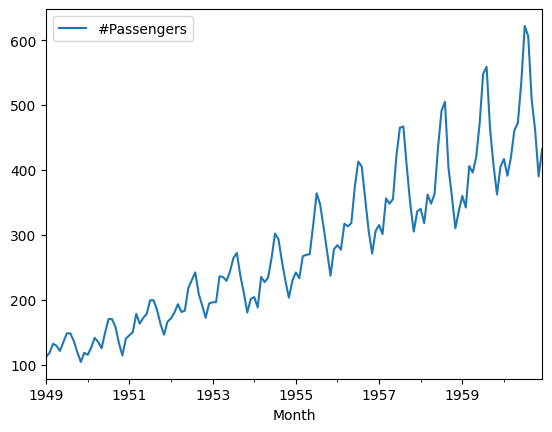

In [18]:
data.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result=adfuller(data['#Passengers'])
pval=result[1]

In [21]:
# null = data is stationary
# altv = not stationary
# pval<0.05 ---> accept null hypo

In [22]:
pval

0.991880243437641

In [23]:
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [24]:
rolling_mean=data.rolling(window=12).mean()

In [25]:
rolling_mean_detrended=data-rolling_mean

# to remove the trend

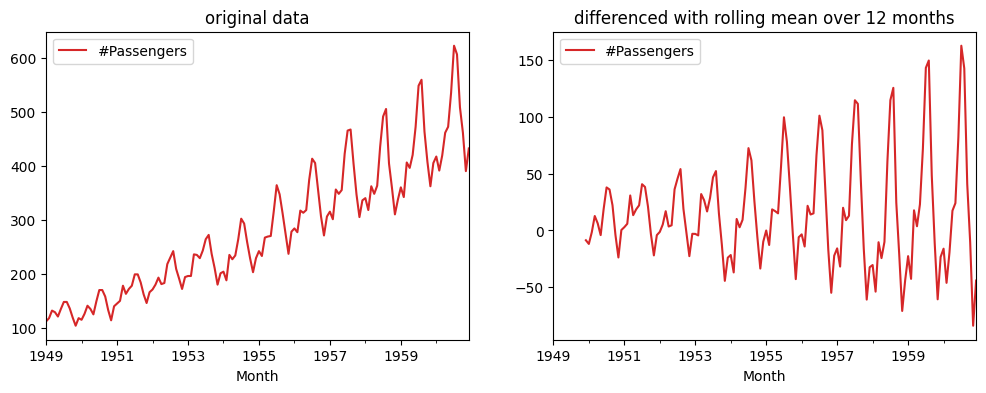

In [26]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",title="differenced with rolling mean over 12 months",ax=ax1)

ax2=plt.subplot(1,2,1)

data.plot(figsize=(12,4),color='tab:red',title="original data",ax=ax2)

plt.show()

In [27]:
rolling_mean_detrended[:13]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
decompose_result=seasonal_decompose(rolling_mean_detrended.dropna())

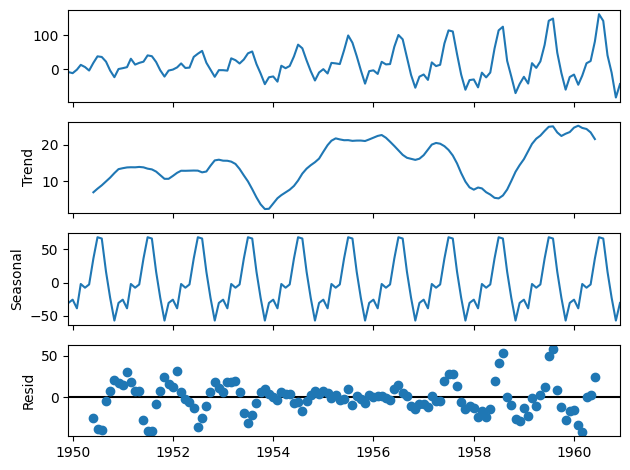

In [30]:
decompose_result.plot();

In [31]:
# seasonal differencing--> shift()

In [32]:
rolling_mean_detrended[:13]

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [33]:
rolling_mean_detrended.shift()[:13]
# shift data by 1

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [34]:
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

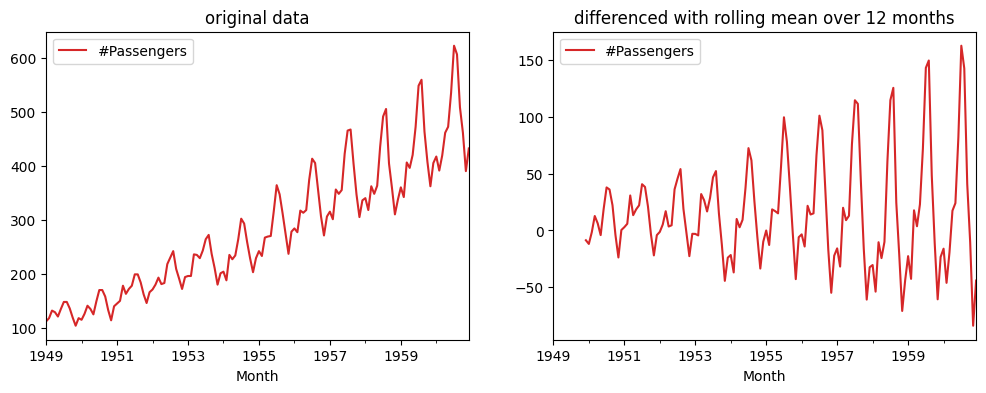

In [35]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",title="differenced with rolling mean over 12 months",ax=ax1)

ax2=plt.subplot(1,2,1)

data.plot(figsize=(12,4),color='tab:red',title="original data",ax=ax2)

plt.show()

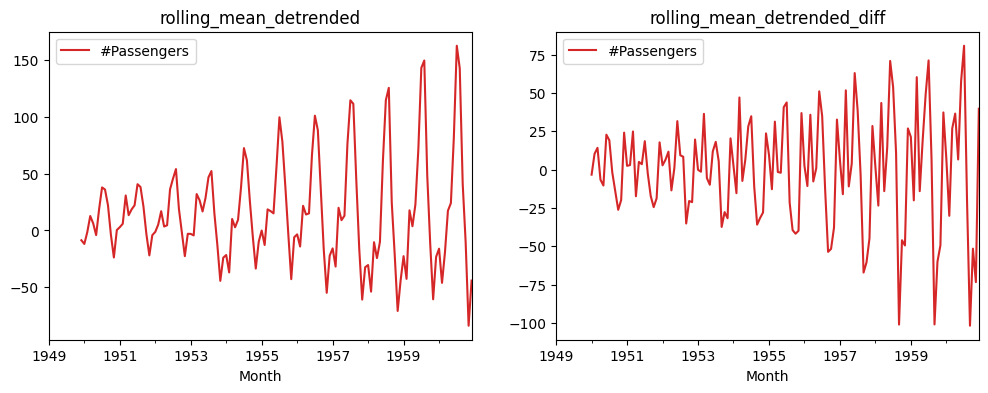

In [36]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended_diff.plot(figsize=(12,4),color="tab:red",title="rolling_mean_detrended_diff",ax=ax1)

ax2=plt.subplot(1,2,1)

rolling_mean_detrended.plot(figsize=(12,4),color='tab:red',title="rolling_mean_detrended",ax=ax2)

plt.show()

In [37]:
rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()

In [38]:
result=adfuller(rolling_mean_detrended_diff['#Passengers'])
pval=result[1]
pval

0.022775264967859258

In [39]:
# yes it is stationary

In [40]:
m=rolling_mean_detrended_diff.rolling(window=12).mean()
s=rolling_mean_detrended_diff.rolling(window=12).std()

Text(0.5, 1.0, 'mean and sd')

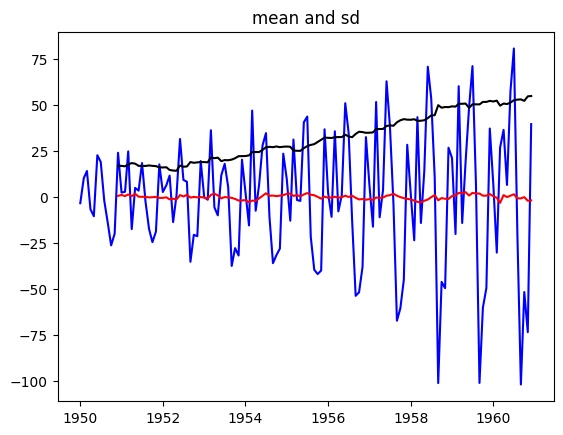

In [41]:
plt.plot(rolling_mean_detrended_diff,color='blue')
plt.plot(m,color='red')
plt.plot(s,color='black')
plt.title("mean and sd")

In [42]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.9 MB/s eta 0:00:00


In [43]:
from pmdarima import auto_arima

In [44]:
order=auto_arima(rolling_mean_detrended_diff['#Passengers'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [45]:
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Sat, 08 Mar 2025   AIC                           1235.785
Time:                        08:11:37   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.346      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9136      0.128     -7.154      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.884      0.000      -1.150      -0.491
ma.L3          0.7468      0.095      7.850      0.000       0.560       0.933
sigma2       586.1896     67.804      8.645      0.000     453.297     719.082
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [47]:
train=rolling_mean_detrended_diff.iloc[:120]['#Passengers'] # 1st 120 rows for training (10 yr)
test=rolling_mean_detrended_diff.iloc[120:]['#Passengers'] # remaining rows after 120 i will take for train

In [48]:
train
# 10 yr

,#Passengers
Month,
1950-01-01,-3.250000
1950-02-01,10.333333
1950-03-01,14.250000
1950-04-01,-6.500000
1950-05-01,-10.333333
...,...
1959-08-01,6.500000
1959-09-01,-100.916667
1959-10-01,-60.000000


In [49]:
test
# 1 yr

,#Passengers
Month,
1960-01-01,7.250000
1960-02-01,-30.083333
1960-03-01,26.916667
1960-04-01,36.583333
1960-05-01,6.666667
1960-06-01,57.750000
1960-07-01,80.833333
1960-08-01,-19.916667
1960-09-01,-101.750000


In [50]:
model=ARIMA(train,order=(3,0,3)) # ARMA ---> i=0
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [51]:
len(train)

120

In [52]:
len(train)+len(test)-1

131

In [53]:
rolling_mean_detrended_diff['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Month'>

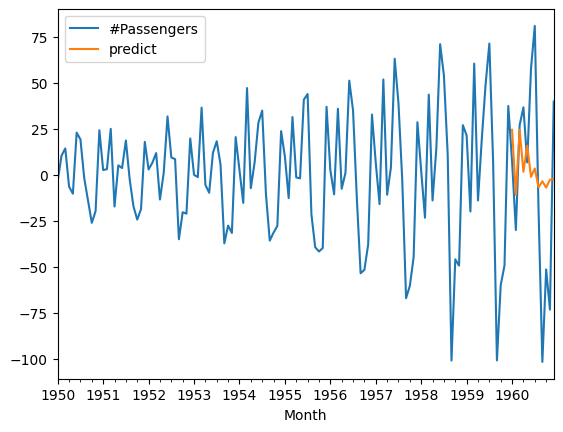

In [54]:
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
model=SARIMAX(train,order=(3,0,3),seasonal_order=(3,0,3,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
model=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:

rolling_mean_detrended_diff['predict']=model.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Month'>

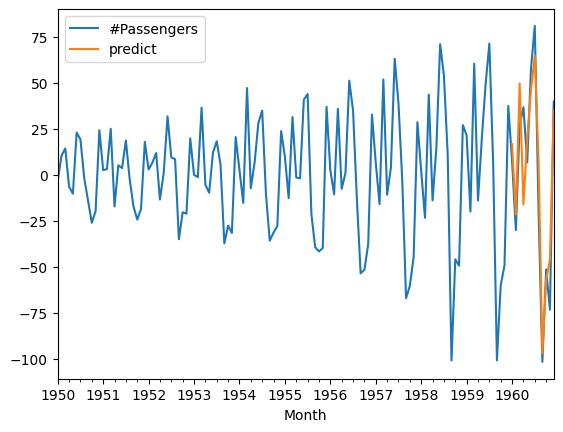

In [59]:
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

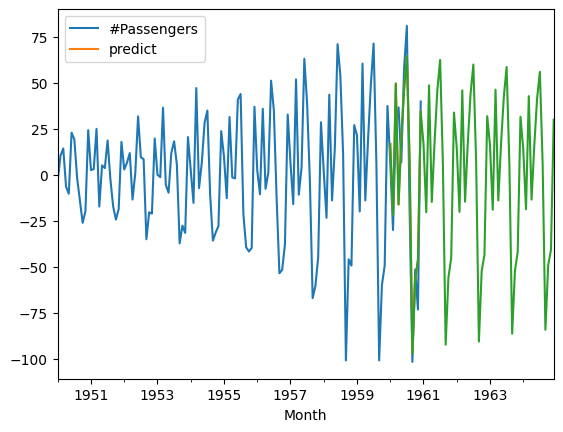

In [60]:
forecast=model.forecast(steps=60)
rolling_mean_detrended_diff.plot()
forecast.plot()